In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Imports 
df1 = pd.read_csv("asset1.csv", parse_dates=['Date'], index_col='Date')
df2 = pd.read_csv("asset2.csv", parse_dates=['Date'], index_col='Date')

In [3]:
print(df1.info())
print("="*40)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16423 entries, 2015-04-10 to 1950-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       16423 non-null  float64
 1   High       16423 non-null  float64
 2   Low        16423 non-null  float64
 3   Close      16423 non-null  float64
 4   Volume     16423 non-null  int64  
 5   Adj Close  16423 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 898.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6362 entries, 2015-04-10 to 1990-01-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6362 non-null   float64
 1   High       6362 non-null   float64
 2   Low        6362 non-null   float64
 3   Close      6362 non-null   float64
 4   Volume     6362 non-null   int64  
 5   Adj Close  6362 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 347.9 KB
No

In [3]:
print(df1.head()) # Large stock
print("="*70)
print(df2.head()) # Small stock
print("="*70)
print(f"{df1.shape}")
print(f"{df2.shape}")

               Open     High      Low    Close      Volume  Adj Close
Date                                                                 
2015-04-10  2091.51  2102.61  2091.51  2102.06   536200000    2102.06
2015-04-09  2081.29  2093.31  2074.29  2091.18  3172360000    2091.18
2015-04-08  2076.94  2086.69  2073.30  2081.90  3265330000    2081.90
2015-04-07  2080.79  2089.81  2076.10  2076.33  3065510000    2076.33
2015-04-06  2064.87  2086.99  2056.52  2080.62  3302970000    2080.62
             Open   High    Low  Close  Volume  Adj Close
Date                                                     
2015-04-10  13.20  13.26  12.51  12.58       0      12.58
2015-04-09  14.14  14.59  13.09  13.09       0      13.09
2015-04-08  14.59  14.77  13.75  13.98       0      13.98
2015-04-07  14.57  14.81  14.01  14.78       0      14.78
2015-04-06  15.75  15.76  14.04  14.74       0      14.74
(16423, 6)
(6362, 6)


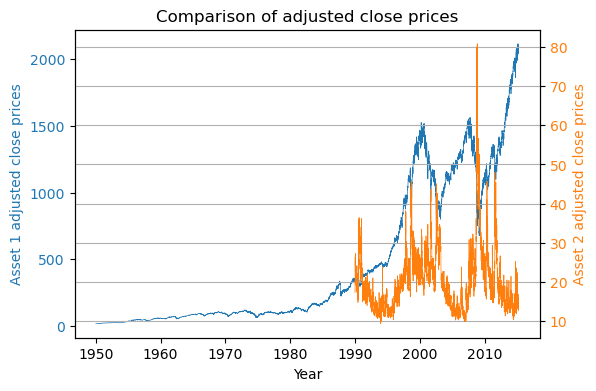

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))


ax.plot(df1.index, df1['Adj Close'], color='C0', label='Larger stock', linewidth=0.5)
ax.set_ylabel('Asset 1 adjusted close prices', color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.set_xlabel('Year')

ax = ax.twinx()
ax.plot(df2.index, df2['Adj Close'], color='C1', label='Smaller stock', linewidth=0.5)
ax.set_ylabel('Asset 2 adjusted close prices', color='C1')
ax.tick_params(axis='y', labelcolor='C1')

plt.title('Comparison of adjusted close prices')

plt.grid()
plt.show()

# We can see that asset 2 is more volatile, but the levels of asset 1 are higher

In [5]:
df1['daily_returns'] = df1['Adj Close'].pct_change()
df2['daily_returns'] = df2['Adj Close'].pct_change()
print(df1.head())
print("="*80)
print(df2.head())

               Open     High      Low    Close      Volume  Adj Close  \
Date                                                                    
2015-04-10  2091.51  2102.61  2091.51  2102.06   536200000    2102.06   
2015-04-09  2081.29  2093.31  2074.29  2091.18  3172360000    2091.18   
2015-04-08  2076.94  2086.69  2073.30  2081.90  3265330000    2081.90   
2015-04-07  2080.79  2089.81  2076.10  2076.33  3065510000    2076.33   
2015-04-06  2064.87  2086.99  2056.52  2080.62  3302970000    2080.62   

            daily_returns  
Date                       
2015-04-10            NaN  
2015-04-09      -0.005176  
2015-04-08      -0.004438  
2015-04-07      -0.002675  
2015-04-06       0.002066  
             Open   High    Low  Close  Volume  Adj Close  daily_returns
Date                                                                    
2015-04-10  13.20  13.26  12.51  12.58       0      12.58            NaN
2015-04-09  14.14  14.59  13.09  13.09       0      13.09       0.040541


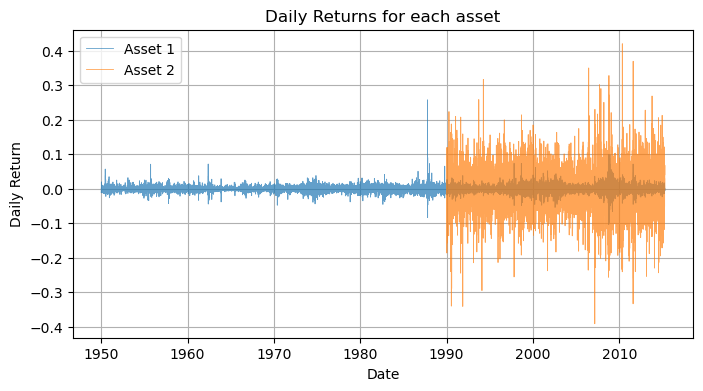

Annualised volatility for asset 1: 0.16
Annualised volatility for asset 2: 0.96


In [6]:
plt.figure(figsize=(8, 4))
plt.plot(df1.index, df1['daily_returns'], label='Asset 1', color='C0', alpha=0.7, linewidth=0.6)
plt.plot(df2.index, df2['daily_returns'], label='Asset 2', color='C1', alpha=0.7, linewidth=0.6)

plt.title('Daily Returns for each asset')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()

# Asset 2 is more volatile. (Look at WQU DSLab for )
print(f"Annualised volatility for asset 1: {round(df1['daily_returns'].std()*np.sqrt(252), 2)}")
print(f"Annualised volatility for asset 2: {round(df2['daily_returns'].std()*np.sqrt(252), 2)}")


**Strategy S:**
- Buy and hold asset when price is above MA of d days (d=100). So buy 1 share if price > MA(d) and position = 1.
- Otherwise, sell share if we hold it and set position to 0.
- Position is either hold a share (1) or hold nothing (0)

In [7]:
def get_data(filename: str) -> pd.DataFrame:
    df = pd.read_csv(filename, parse_dates=["Date"], index_col="Date").sort_index()
    df['daily_returns'] = df['Adj Close'].pct_change()
    return df

In [8]:
# Load data
df1 = get_data("asset1.csv")
df2 = get_data("asset2.csv")

print(df1.head())
print("="*75)
print(df2.head())

             Open   High    Low  Close   Volume  Adj Close  daily_returns
Date                                                                     
1950-01-03  16.66  16.66  16.66  16.66  1260000      16.66            NaN
1950-01-04  16.85  16.85  16.85  16.85  1890000      16.85       0.011405
1950-01-05  16.93  16.93  16.93  16.93  2550000      16.93       0.004748
1950-01-06  16.98  16.98  16.98  16.98  2010000      16.98       0.002953
1950-01-09  17.08  17.08  17.08  17.08  2520000      17.08       0.005889
             Open   High    Low  Close  Volume  Adj Close  daily_returns
Date                                                                    
1990-01-02  17.24  17.24  17.24  17.24       0      17.24            NaN
1990-01-03  18.19  18.19  18.19  18.19       0      18.19       0.055104
1990-01-04  19.22  19.22  19.22  19.22       0      19.22       0.056625
1990-01-05  20.11  20.11  20.11  20.11       0      20.11       0.046306
1990-01-08  20.26  20.26  20.26  20.26      

In [163]:
def plot_signals_S(df: pd.DataFrame, buy_signals, sell_signals):

    plt.figure(figsize=(8, 6))
    plt.plot(df['Adj Close'], label='Adjusted Close price', color='C0', linewidth=0.5, alpha=0.5)
    plt.plot(df['SMA'], label='SMA', color='C1', alpha=0.5)
    plt.title(f'Buy and sell signals from strategy S for asset 1')
    plt.xlabel('Date')
    plt.ylabel('Prices')

    plt.scatter(
        buy_signals,
        df["SMA"][buy_signals]-125,
        color="green",
        marker="^",
        s=20,
        label="Buy signal",
        alpha=0.3
    )

    plt.scatter(
        sell_signals,
        df["SMA"][sell_signals]+125,
        color="red",
        marker="v",
        s=20,
        label="Sell signal",
        alpha=0.3
    )

    plt.legend()
    plt.minorticks_on()
    plt.grid(True, which='major', linestyle='--', linewidth=0.7)
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
    plt.grid(True)
    plt.show()


def strategy_S_no_fees(df: pd.DataFrame, d: int = 100, plot: bool = False) -> pd.Series:
    """
    Returns the PnL of strategy S when applied to asset in data

    Arguments:
    ----------
    df : pd.DataFrame
        Pandas DataFrame containing timeseries data of some asset 
        such as prices and traded volume.
    d : int
        The window length of the moving average
    
    Returns:
    --------
    pd.Series
        Timeseries data of the PnL if we use strategy S on the data
    """

    df["SMA"] = df["Adj Close"].rolling(window=d).mean() # d/252 days
    df.dropna(inplace=True) # First d days are NaN
    df["position"] = np.where(df["Adj Close"] > df["SMA"], 1, 0)
    a = df["position"].iloc[0]

    if plot:
        b = df["position"].iloc[1]
        c = 0 if (a == b and a == 1) else (1 if (a == b and a == 0) else a)
        df.at[df.index[0], "position"] = c # Initial signal

        change_in_positions = df["position"].diff()
        buy_signals = df.index[change_in_positions == 1] # A change from 0 to 1
        sell_signals = df.index[change_in_positions == -1] # A change from 1 to 0  

        plot_signals_S(df, buy_signals, sell_signals)
    
    df.at[df.index[0], "position"] = a
    initial_capital = 1000
    df["position"] = df["position"].shift(1)
    df.dropna(inplace=True)
    df["strategy_returns"] = df["daily_returns"] * df["position"]
    df["PnL"] = initial_capital * (1 + df["strategy_returns"]).cumprod()
    df1.dropna(inplace=True)

    df.drop("SMA", axis=1, inplace=True)
    
    return df


# Idea for further development: 
# 1. Consider a data set, consider a wide variety of strategies and return the signals as a Series




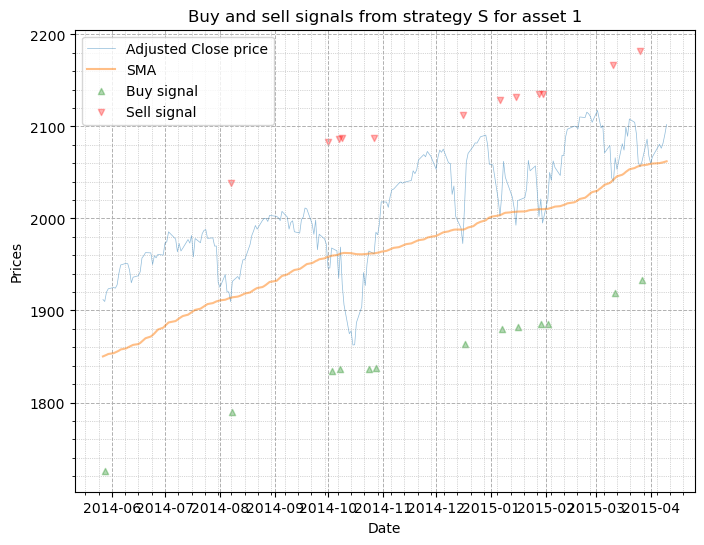

,Open,High,Low,Close,Volume,Adj Close,daily_returns,position,strategy_returns,PnL
Date,,,,,,,,,,
2014-05-28,1911.77,1914.46,1907.30,1909.78,2976450000,1909.78,-0.001114,1.0,-0.001114,998.885931
2014-05-29,1910.60,1920.03,1909.82,1920.03,2709050000,1920.03,0.005367,1.0,0.005367,1004.247062
2014-05-30,1920.33,1924.03,1916.64,1923.57,3263490000,1923.57,0.001844,1.0,0.001844,1006.098613
2014-06-02,1923.87,1925.88,1915.98,1924.97,2509020000,1924.97,0.000728,1.0,0.000728,1006.830865
2014-06-03,1923.07,1925.07,1918.79,1924.24,2867180000,1924.24,-0.000379,1.0,-0.000379,1006.449048


In [164]:
df = strategy_S_no_fees(get_data("asset1.csv").loc["2014":"2016"],100,True)
df.head()

In [72]:
df1["position"].iloc[0] = 0 if (df1["position"].iloc[1] > df1["position"].iloc[1]) \
    elif  

1

In [96]:
df1["position"].iloc[0:4]

Date
1990-01-02    0
1990-01-03    1
1990-01-04    1
1990-01-05    1
Name: position, dtype: int32

In [136]:
df1["position"].iloc[0] = c
type(df1)

C:\Users\SUMUN\AppData\Local\Temp\ipykernel_23348\2129490871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["position"].iloc[0] = c


pandas.core.frame.DataFrame

In [100]:
df1 = get_data("asset1.csv")
df1["SMA"] = df1["Adj Close"].rolling(window=100).mean() # 100/252 years
df1.dropna(inplace=True)
df1["position"] = np.where(df1["Adj Close"] > df1["SMA"], 1, 0)
df1.dropna(inplace=True)

a = df1["position"].iloc[0]
b = df1["position"].iloc[1]
c = 0 if (a == b and a == 1) else (1 if (a == b and a == 0) else a)

df1.at[df1.index[0], "position"] = c

df1.head()

,Open,High,Low,Close,Volume,Adj Close,daily_returns,SMA,position
Date,,,,,,,,,
1950-05-25,18.69,18.69,18.69,18.69,1480000,18.69,0.000000,17.5128,0
1950-05-26,18.67,18.67,18.67,18.67,1330000,18.67,-0.001070,17.5329,1
1950-05-29,18.72,18.72,18.72,18.72,1110000,18.72,0.002678,17.5516,1
1950-05-31,18.78,18.78,18.78,18.78,1530000,18.78,0.003205,17.5701,1
1950-06-01,18.77,18.77,18.77,18.77,1580000,18.77,-0.000532,17.5880,1


In [107]:
df1.head()

,Open,High,Low,Close,Volume,Adj Close,daily_returns,SMA,position
Date,,,,,,,,,
1950-05-25,18.69,18.69,18.69,18.69,1480000,18.69,0.000000,17.5128,0
1950-05-26,18.67,18.67,18.67,18.67,1330000,18.67,-0.001070,17.5329,1
1950-05-29,18.72,18.72,18.72,18.72,1110000,18.72,0.002678,17.5516,1
1950-05-31,18.78,18.78,18.78,18.78,1530000,18.78,0.003205,17.5701,1
1950-06-01,18.77,18.77,18.77,18.77,1580000,18.77,-0.000532,17.5880,1


In [108]:
type(buy_signals)

pandas.core.indexes.datetimes.DatetimeIndex

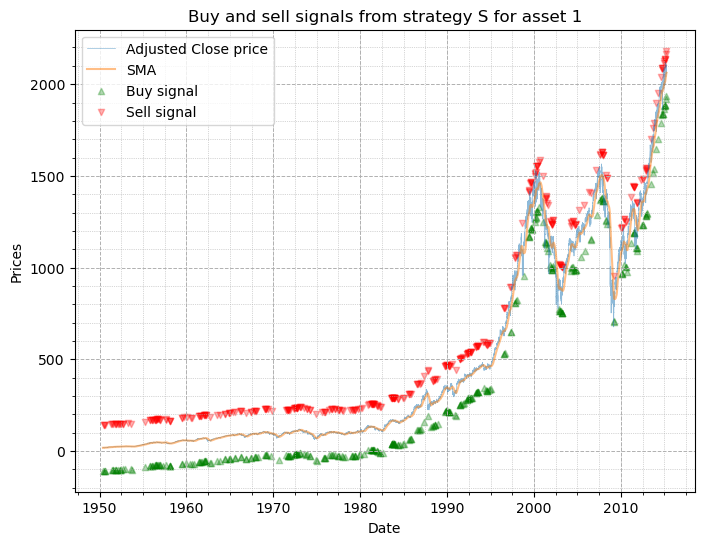

In [151]:
# Test
df1 = get_data("asset1.csv")
df1["SMA"] = df1["Adj Close"].rolling(window=100).mean() # 100/252 years
df1.dropna(inplace=True)
df1["position"] = np.where(df1["Adj Close"] > df1["SMA"], 1, 0)

# Only needed for first signal, will be discarded in PnL calculation
a = df1["position"].iloc[0]
b = df1["position"].iloc[1]
c = 0 if (a == b and a == 1) else (1 if (a == b and a == 0) else a)
df1.at[df1.index[0], "position"] = c # Initial signal

#df1 = df1[:"1951-01-02"] # Sliced


change_in_positions = df1["position"].diff()
buy_signals = df1.index[change_in_positions == 1] # A change from 0 to 1
sell_signals = df1.index[change_in_positions == -1] # A change from 1 to 0


plt.figure(figsize=(8, 6))
plt.plot(df1['Adj Close'], label='Adjusted Close price', color='C0', linewidth=0.5, alpha=0.5)
plt.plot(df1['SMA'], label='SMA', color='C1', alpha=0.5)
plt.title(f'Buy and sell signals from strategy S for asset 1')
plt.xlabel('Date')
plt.ylabel('Prices')

plt.scatter(
    buy_signals,
    df1["SMA"][buy_signals]-125,
    color="green",
    marker="^",
    s=20,
    label="Buy signal",
    alpha=0.3
)

plt.scatter(
    sell_signals,
    df1["SMA"][sell_signals]+125,
    color="red",
    marker="v",
    s=20,
    label="Sell signal",
    alpha=0.3
)

plt.legend()
plt.minorticks_on()
plt.grid(True, which='major', linestyle='--', linewidth=0.7)
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
plt.grid(True)
plt.show()



In [131]:
df1["position"] = df1["position"].shift(1)
#df1.dropna(inplace=True)
df1.head()

,Open,High,Low,Close,Volume,Adj Close,daily_returns,SMA,position
Date,,,,,,,,,
1950-05-25,18.69,18.69,18.69,18.69,1480000,18.69,0.000000,17.5128,NaN
1950-05-26,18.67,18.67,18.67,18.67,1330000,18.67,-0.001070,17.5329,0.0
1950-05-29,18.72,18.72,18.72,18.72,1110000,18.72,0.002678,17.5516,1.0
1950-05-31,18.78,18.78,18.78,18.78,1530000,18.78,0.003205,17.5701,1.0
1950-06-01,18.77,18.77,18.77,18.77,1580000,18.77,-0.000532,17.5880,1.0


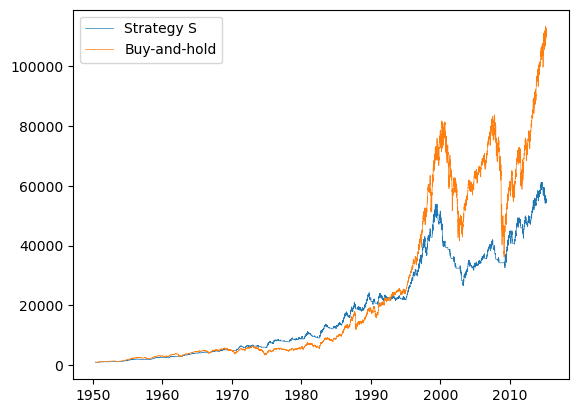

In [82]:
# We need to shift the position by one day in the future.
# This is because strategy S is based on Close price and SMA.
# This means S can only be executed the following day since markets are closed.
# So, we lag the position by one day in the future.

initial_capital = 1000
df1["position"] = df1["position"].shift(1)
df1["strategy_returns"] = df1["daily_returns"] * df1["position"]
df1["PnL_S"] = initial_capital * (1 + df1["strategy_returns"]).cumprod()
df1["PnL_buy_and_hold"] = initial_capital * (1 + df1["daily_returns"]).cumprod()
 
plt.plot(df1['PnL_S'], label='Strategy S', linewidth=0.5)
plt.plot(df1['PnL_buy_and_hold'], label='Buy-and-hold', linewidth=0.5)
plt.legend()
plt.show();



In [65]:
df1.head()

,Open,High,Low,Close,Volume,Adj Close,daily_returns,SMA,position,strategy_returns,PnL_S,PnL_buy_and_hold
Date,,,,,,,,,,,,
1990-01-02,353.40,359.69,351.98,359.69,162070000,359.69,0.017799,346.1459,NaN,NaN,NaN,1017.798529
1990-01-03,359.69,360.59,357.89,358.76,192330000,358.76,-0.002586,346.2510,1.0,-0.002586,997.414440,1015.166950
1990-01-04,358.76,358.76,352.89,355.67,177000000,355.67,-0.008613,346.3603,1.0,-0.008613,988.823709,1006.423316
1990-01-05,355.67,355.67,351.35,352.20,158530000,352.20,-0.009756,346.4517,1.0,-0.009756,979.176513,996.604414
1990-01-08,352.20,354.24,350.54,353.79,140110000,353.79,0.004514,346.5425,1.0,0.004514,983.596986,1001.103565


In [66]:
# Performance of strategy S for asset 1 


# PnL plot here
reward_S = df1['PnL_S'].iloc[-1] - initial_capital 
risk_S = df1['strategy_returns'].std() * np.sqrt(252) # Annual risk
risk_to_reward_ratio = reward_S/risk_S

print(f"Reward: {round(reward_S)}")
print(f"Risk: {round(risk_S,2)}")
print(f"Risk-to-reward ratio: {round(risk_to_reward_ratio, 2)}")

risk_free_rate = 0.03 # Annual risk-free rate
excess_returns = df1["strategy_returns"].mean() * 252 - risk_free_rate # Annual
sharpe_S = excess_returns/risk_S # Annual

print(f"Excess returns: {round(excess_returns, 2)}")
print(f"Sharpe ratio: {round(sharpe_S, 2)}") # Sharpe? ratio (although it is excess return)

# Other metrics e.g. fitness and drawdown

Reward: 1556
Risk: 0.11
Risk-to-reward ratio: 14114.91
Excess returns: 0.01
Sharpe ratio: 0.12


In [67]:
# Performance of strategy S for asset 2

In [48]:
risk_S

0.006945946561406214

In [ ]:
# Future work: Strategies that take into account regime changes
# Resources: 

In [ ]:
def PnL_plot(strategy, data):
    pass

